In [1]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import os
import PIL
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [2]:
import requests
r=requests.get(url='https://serv.gcis.nat.gov.tw/pub/kaptcha.jpg')
with open('tw_photo.jpg','wb') as f:
    f.write(r.content)

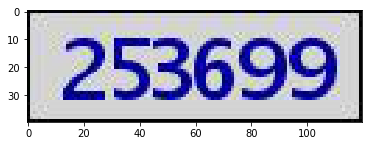

In [3]:
img = Image.open('tw_photo.jpg').convert('RGB')
plt.imshow(img)
np_img = np.array(img)

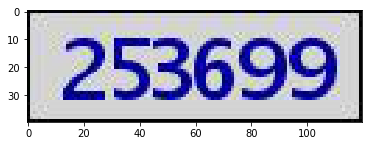

In [4]:
plt.imshow(np_img)

In [5]:
gray = cv2.cvtColor(np_img,cv2.COLOR_BGR2GRAY)

In [6]:
ret,thresh = cv2.threshold(gray,127,255,0)

In [7]:
ret

127.0

In [8]:
thresh

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       ...,
       [  0, 255, 255, ..., 255, 255,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

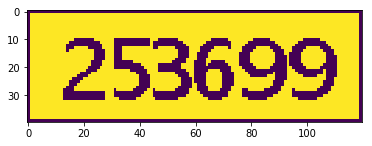

In [9]:
plt.imshow(thresh)

In [10]:
img,contour,hier = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [11]:
img

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       ...,
       [  0, 255, 255, ..., 255, 255,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [12]:
contour

[array([[[  1,   1]],
 
        [[  1,  38]],
 
        [[118,  38]],
 
        [[118,   1]]], dtype=int32), array([[[ 98,  10]],
 
        [[ 99,   9]],
 
        [[104,   9]],
 
        [[105,  10]],
 
        [[106,  10]],
 
        [[110,  14]],
 
        [[110,  15]],
 
        [[111,  16]],
 
        [[111,  23]],
 
        [[110,  24]],
 
        [[110,  26]],
 
        [[109,  27]],
 
        [[109,  28]],
 
        [[107,  30]],
 
        [[106,  30]],
 
        [[105,  31]],
 
        [[104,  31]],
 
        [[103,  32]],
 
        [[ 97,  32]],
 
        [[ 96,  31]],
 
        [[ 95,  31]],
 
        [[ 94,  30]],
 
        [[ 94,  28]],
 
        [[ 95,  27]],
 
        [[ 96,  28]],
 
        [[103,  28]],
 
        [[105,  26]],
 
        [[105,  25]],
 
        [[106,  24]],
 
        [[106,  21]],
 
        [[106,  22]],
 
        [[105,  23]],
 
        [[104,  23]],
 
        [[103,  24]],
 
        [[ 99,  24]],
 
        [[ 98,  23]],
 
        [[ 97,  23]],
 
    

In [13]:
cnts=sorted([(c,cv2.boundingRect(c)[0]) for c in contour],key=lambda x:x[1])

In [23]:
rets =[]
for c,b in cnts:
    x,y,w,h = cv2.boundingRect(c)
    if h==24:
        if w>20:
            rets.append((x,y,int(w/2),h))
            rets.append((x,y+int(w/2),int(w/2),h))
        else:
            rets.append((x,y,w,h))

In [24]:
rets

[(12, 9, 17, 24),
 (30, 9, 15, 24),
 (44, 9, 16, 24),
 (59, 9, 16, 24),
 (75, 9, 19, 24),
 (93, 9, 19, 24)]

In [26]:
import time
for idx,cord in enumerate(rets):
    print(cord)
    (x,y,w,h) = cord
    plt.imsave('{}.jpg'.format(idx),thresh[y:y+h,x:x+w])
#     time.sleep(5)

(12, 9, 17, 24)
(30, 9, 15, 24)
(44, 9, 16, 24)
(59, 9, 16, 24)
(75, 9, 19, 24)
(93, 9, 19, 24)


In [22]:
input_folder = r'C:\OneDrive\code\bilibili_recognize_captcha_and_get_kit\douplings\douplings-{}'

In [23]:
datas=[]
labels=[]
for digital in range(0,12):
    for file in os.listdir(input_folder.format(digital)):
#         print(file)
        full_path = input_folder.format(digital)+'\\'+file
#         print(file)
        img = Image.open(full_path).convert('1')
#         img=img.resize((12,15),PIL.Image.ANTIALIAS)
        datas.append([pixel for pixel in iter(img.getdata())])
        labels.append(digital)

In [4]:
len(datas)

319

In [5]:
datas[1]

[255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 0,
 255,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 255,
 0,
 0,
 255,
 0,
 0,
 255,
 0,
 0,
 255,
 0,
 0,


In [6]:
len(labels)

319

In [7]:
np_data = np.array(datas)

In [8]:
np_data.shape

(319, 800)

In [9]:
len(np_data[0])

800

In [10]:
np_data

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

In [11]:
scaler = StandardScaler()
scaler.fit(np_data)

c:\python3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
X_scaled=scaler.transform(np_data)

c:\python3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30),activation='logistic',max_iter=2000)
mlp.fit(X_scaled,labels)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [15]:
predict = mlp.predict(X_scaled)

In [16]:
for i in predict:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11


In [ ]:
a=[]
b1=[1,2,3]
b2=[4,5,6]
a.append(b1)
a.append(b2)
a

In [ ]:
new_data=np.array(a)

In [ ]:
new_data.shape

In [14]:
from sklearn.externals import joblib

In [15]:
joblib.dump(mlp,'captcha.pkl')

['captcha.pkl']

(1, 800)


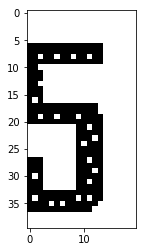

In [16]:
# test_data
test_data=[]
file = r'C:\OneDrive\code\bilibili_recognize_captcha_and_get_kit\douplings\douplings-5\test11-4.jpg'
imgt = Image.open(file).convert('1')
# print(len(img))
plt.imshow(imgt)
# imgt = imgt.resize((12,15),Image.ANTIALIAS)
test_data.append([pixel for pixel in iter(imgt.getdata())])
np_test_data = np.array(test_data)
print(np_test_data.shape)

In [18]:
# scaler1 = StandardScaler()
# scaler.fit(np_test_data)
X_test_scaled=scaler.transform(np_test_data)
y_predict=mlp.predict(X_test_scaled)

c:\python3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
y_predict[0]

5

In [18]:
if os.path.exists('captcha.pkl'):
    model = joblib.load('captcha.pkl')
    X_test_scaled=scaler.transform(np_test_data)
    result= model.predict(X_test_scaled)
    print(result[0])

5


c:\python3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
